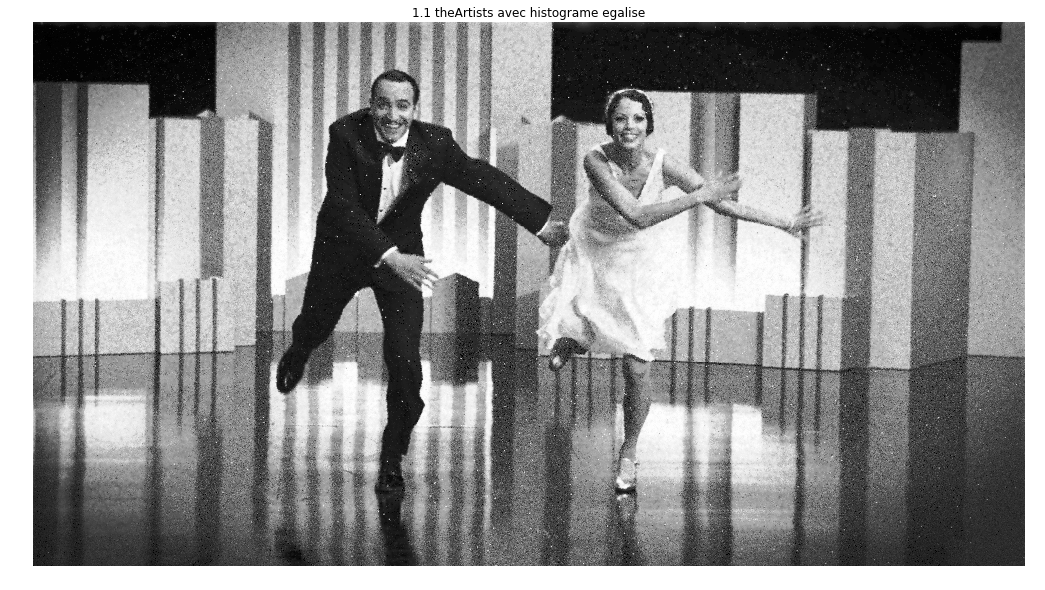

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.ndimage import label
from scipy import fftpack
from IPython.display import Image
from scipy.misc import imrotate
import numpy as np
import scipy.ndimage
import warnings
import cv2

warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

def histeq(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    return cdf[img]

img = cv2.imread('theArtist.png', cv2.IMREAD_GRAYSCALE)
img_eq = histeq(img)
plt.figure(figsize=(20,10))
plt.imshow(img_eq, cmap='gray')
plt.title('1.1 theArtists avec histograme egalise')
plt.axis('off');

In [2]:
# 1.2
#
# inspire de :
# http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html
#

def convol(image, mask):
    mask = np.flipud(np.fliplr(mask))    # Flip the kernel
    mask_dim  = mask.shape[0]
    pad_dim = int((mask.shape[0] - 1) / 2)
    
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2 * pad_dim, image.shape[1] + 2 * pad_dim))   
    image_padded[pad_dim:-(pad_dim), pad_dim:-(pad_dim)] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(mask*image_padded[y:y+mask_dim,x:x+mask_dim]).sum()        
    return output


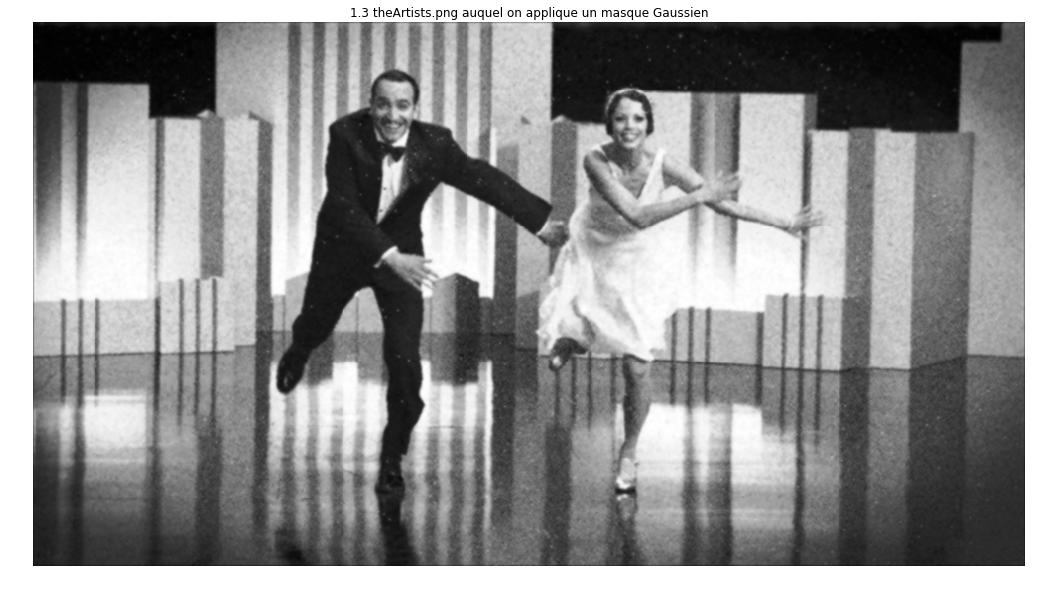

In [3]:
masque_gaussien = np.array(
[
    [	1.	,	2.	,	1.	,	2.	,	1.	],
    [	2.	,	4.	,	8.  ,	4.	,	2.	],
    [	1.	,	8.	,	18. ,	8.	,	1.	],
    [	2.	,	4.	,	8.	,	4.	,	2.	],
    [	1.	,	2.	,	1.	,	2.	,	1.	],
]) / 90.
plt.figure(figsize=(20,10))
img_g = convol(img_eq, masque_gaussien)
plt.imshow(img_g, cmap='gray')
plt.title('1.3 theArtists.png auquel on applique un masque Gaussien')
plt.axis('off');

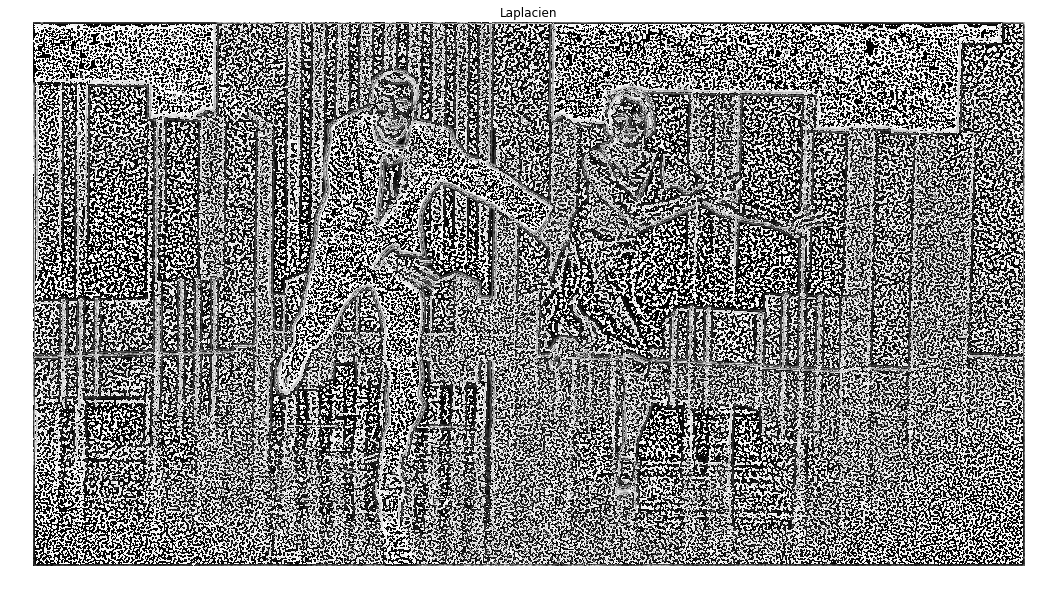

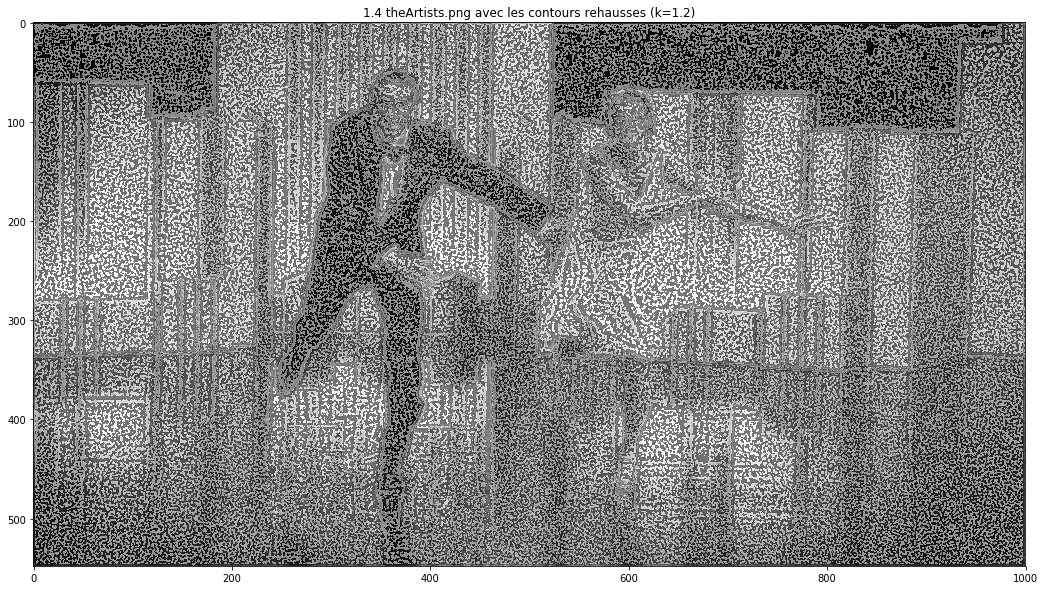

In [4]:
def rehaussement_contour(img, k, print_laplacian=False, print_gaussian=False):
    gausian_mask = np.array([
        [   1   ,   2   ,   1   ],
        [   2   ,   4   ,   2   ],
        [   1   ,   2   ,   1   ]
    ]) / 16
    laplacian = np.array([
        [   -1  ,   -1  ,   -1  ],
        [   -1  ,   8   ,   -1   ],
        [   -1  ,   -1  ,   -1   ],
    ])
    i_g = convol(img, gausian_mask)
    i_l = convol(i_g, laplacian)
    i_r = i_g + k * i_l
    
    if print_gaussian:
        plt.figure(figsize=(20,10))
        plt.imshow(i_g, cmap='gray')
        plt.title('Gaussien')
        plt.axis('off')
        plt.show();
    
    if print_laplacian:
        plt.figure(figsize=(20,10))
        plt.imshow(i_l, cmap='gray')
        plt.title('Laplacien')
        plt.axis('off')
        plt.show();
        
    return i_r


k = 1.2
img_rc = rehaussement_contour(img_eq, k, print_laplacian=True)
plt.figure(figsize=(20,10))
plt.imshow(img_rc, cmap='gray')
plt.title('1.4 theArtists.png avec les contours rehausses (k=' + str(k) + ')');

In [5]:
print("""
1.5
On remarque que l'image avec les contours rehaussés n'est pas très convaincante au niveaux des contours plus subtils. Cela est dû au fait que le Laplacien est extrêmement sensible au bruit. Comme notre image avait beaucoup de bruit de type "poivre et sel", l'atténuation qu'on devrait exercer avec un filtre gaussien doit être plus importante afin de diminuer plus significativement le niveau de bruit dans l'image avant d'appliquer le Laplacien.
On devrait aussi explorer le filtrage par filtre median, qui est très addapté pour filtrer ce type de bruit.
""")


1.5
On remarque que l'image avec les contours rehaussés n'est pas très convaincante au niveaux des contours plus subtils. Cela est dû au fait que le Laplacien est extrêmement sensible au bruit. Comme notre image avait beaucoup de bruit de type "poivre et sel", l'atténuation qu'on devrait exercer avec un filtre gaussien doit être plus importante afin de diminuer plus significativement le niveau de bruit dans l'image avant d'appliquer le Laplacien.
On devrait aussi explorer le filtrage par filtre median, qui est très addapté pour filtrer ce type de bruit.



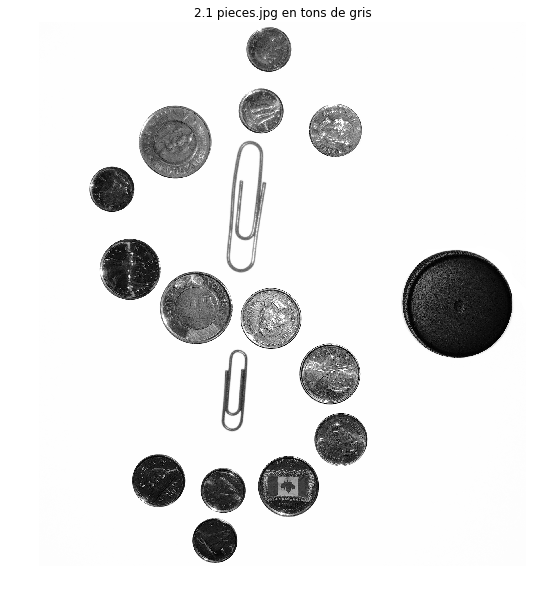

In [6]:
#
# Exercice II
#

img = cv2.imread('pieces.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.imshow(gray_image, cmap='gray')
plt.title('2.1 pieces.jpg en tons de gris')
plt.axis('off')
plt.show();

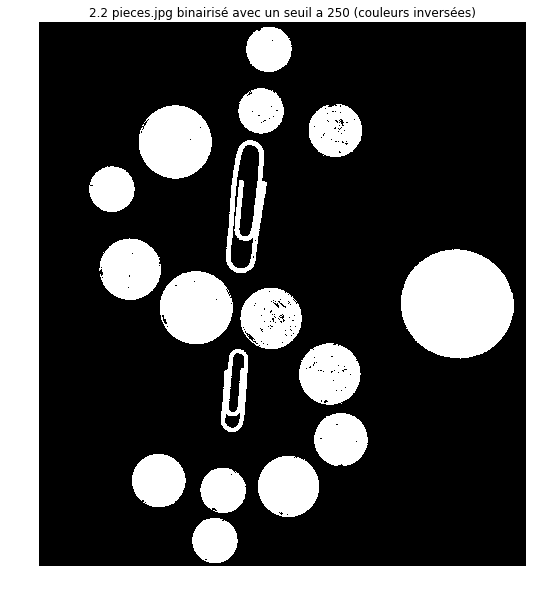

In [7]:
def binairiser(img, threshold):
    return (img >= threshold).astype('uint8')

bin_img = 1 - binairiser(gray_image, 250)
plt.figure(figsize=(20,10))
plt.imshow(bin_img, cmap='gray')
plt.title('2.2 pieces.jpg binairisé avec un seuil a 250 (couleurs inversées)')
plt.axis('off')
plt.show();

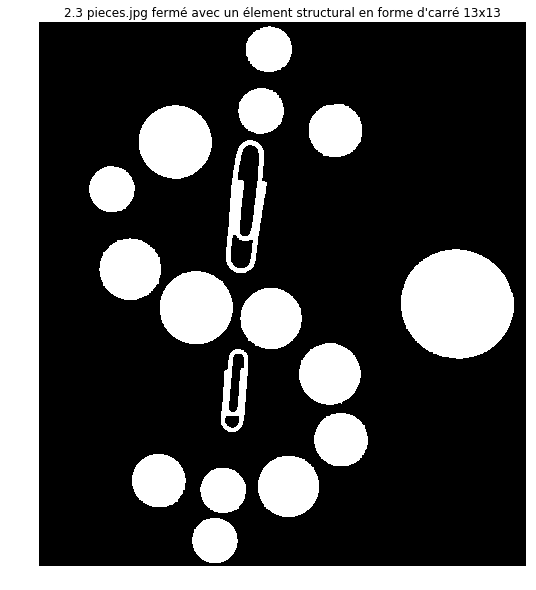

In [8]:
struct_elem = cv2.getStructuringElement(cv2.MORPH_RECT, (13,13))
closed_img = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, struct_elem)

plt.figure(figsize=(20,10))
plt.imshow(closed_img, cmap='gray')
plt.title("2.3 pieces.jpg fermé avec un élement structural en forme d'carré 13x13")
plt.axis('off')
plt.show();

In [9]:
def compter_monnaie(img):
    rayons_monnaies = np.array([10]).astype('uint8')
    masked_img = np.zeros_like(img, dtype='uint8')
    
    # labeling circles with radius exceeding 200px
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (400,400))
    erosion = cv2.erode(img,kernel,iterations = 1)

    # diluting results to remove noise that could have been introduced by erosion
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
    dilution = cv2.dilate(erosion,kernel,iterations = 1)
    
    # counting number of circles too big to be coins
    not_coins_labeled_array, n_not_coins = label(erosion)
    
    # labeling circles with radius exceeding 90px
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (180,180))
    erosion = cv2.erode(img,kernel,iterations = 1)

    # diluting results to remove noise that could have been introduced by erosion
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50,50))
    erosion = cv2.dilate(erosion,kernel,iterations = 1)
    
    # counting number of potential coins
    coins_labeled_array, n_coins = label(erosion)
    
    # removing non-coins from potential coins
    
    coins = n_coins - n_not_coins
    
    return coins


n_coins = compter_monnaie(closed_img)
print("nombre de pieces de monnaie sur l'image:", n_coins)

nombre de pieces de monnaie sur l'image: 14


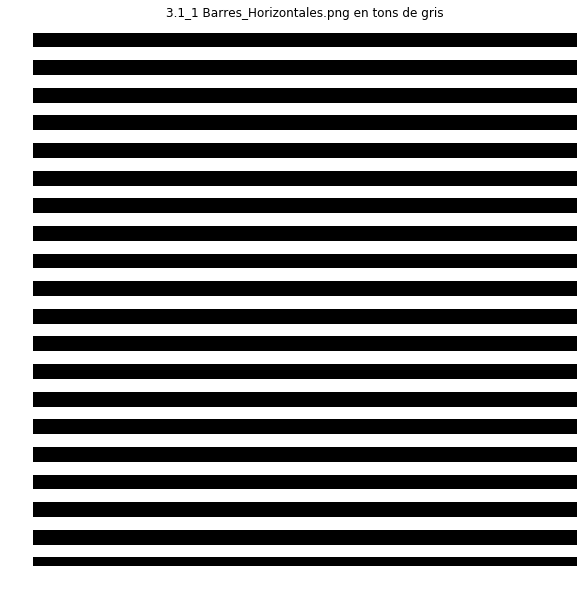

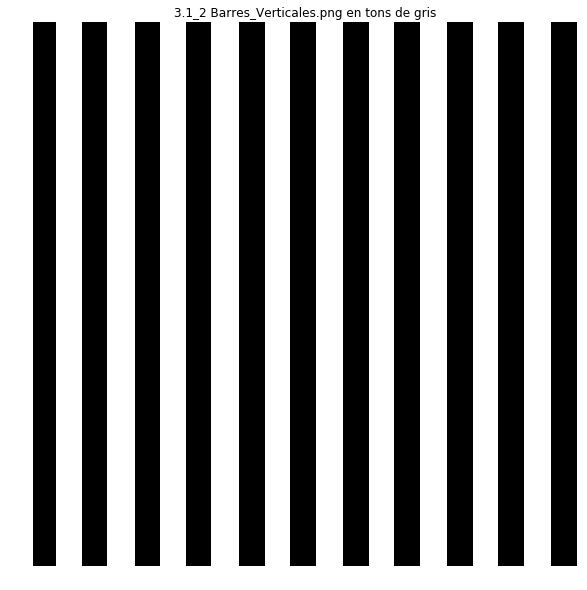

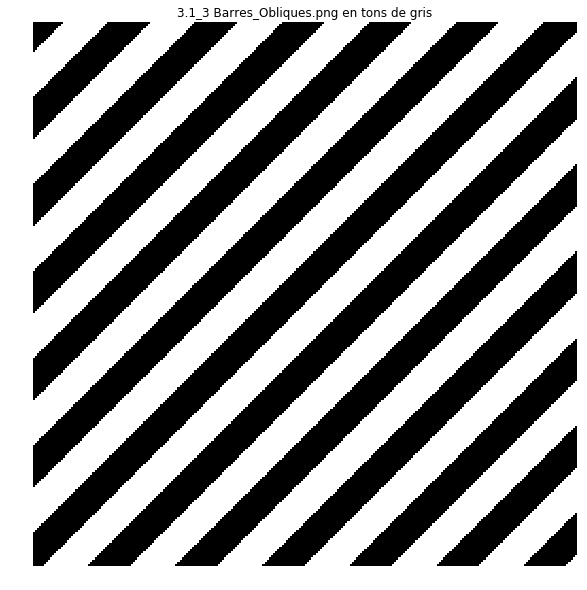

In [10]:
#
# Exercice III
#

img_v = cv2.imread('Barres_Verticales.png', cv2.IMREAD_GRAYSCALE)
img_h = cv2.imread('Barres_Horizontales.png', cv2.IMREAD_GRAYSCALE)
img_o = cv2.imread('Barres_Obliques.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.imshow(img_h, cmap='gray')
plt.title('3.1_1 Barres_Horizontales.png en tons de gris')
plt.axis('off')
plt.show();

plt.figure(figsize=(20,10))
plt.imshow(img_v, cmap='gray')
plt.title('3.1_2 Barres_Verticales.png en tons de gris')
plt.axis('off')
plt.show();

plt.figure(figsize=(20,10))
plt.imshow(img_o, cmap='gray')
plt.title('3.1_3 Barres_Obliques.png en tons de gris')
plt.axis('off')
plt.show();

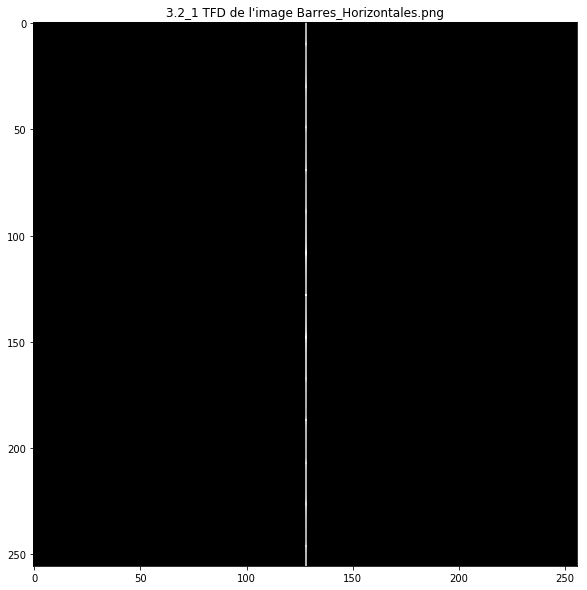

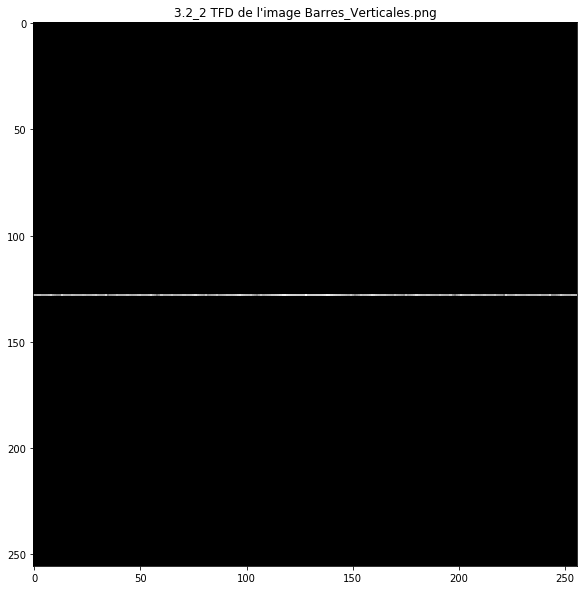

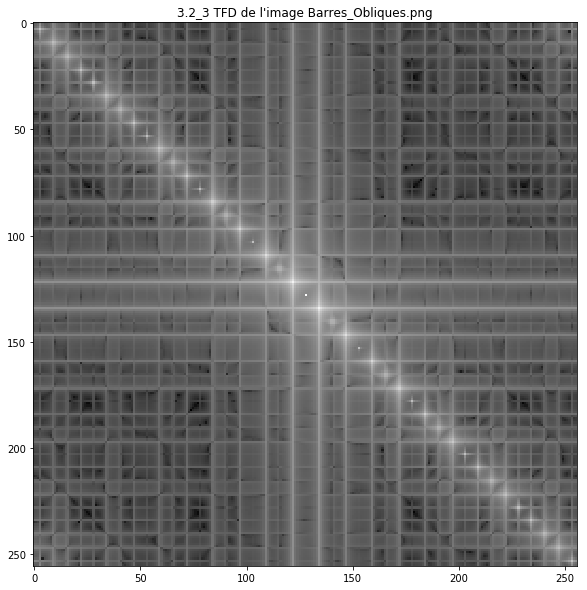

In [11]:
plt.figure(figsize=(20,10))
fft2 = fftpack.fft2(img_h)
fshift = fftpack.fftshift(fft2);
plt.imshow(np.log(1 + abs(fshift)), cmap='gray')
plt.title("3.2_1 TFD de l'image Barres_Horizontales.png")

plt.figure(figsize=(20,10))
fft2 = fftpack.fft2(img_v)
fshift = fftpack.fftshift(fft2);
plt.imshow(np.log10(1 + abs(fshift)), cmap='gray')
plt.title("3.2_2 TFD de l'image Barres_Verticales.png")

plt.figure(figsize=(20,10))
fft2 = fftpack.fft2(img_o)
fshift = fftpack.fftshift(fft2);
plt.imshow(np.log10(1 + abs(fshift)), cmap='gray')
plt.title("3.2_3 TFD de l'image Barres_Obliques.png");

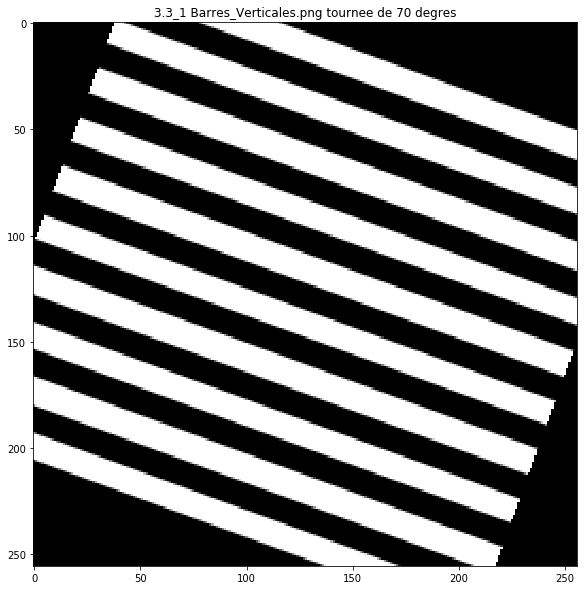

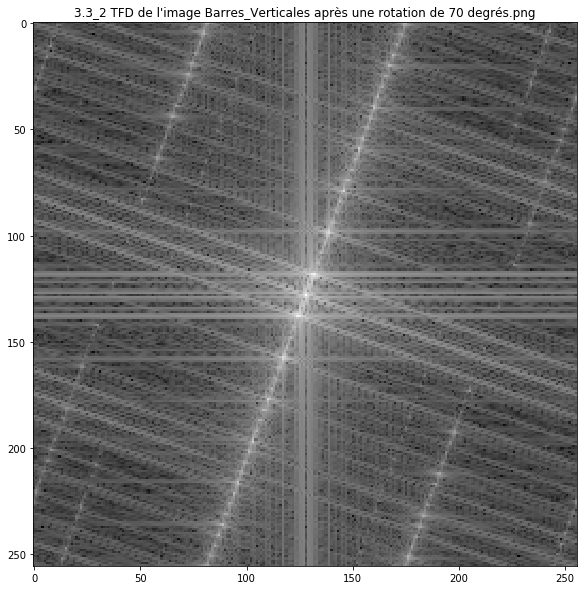

In [12]:
rot = imrotate(img_v, 70, 'bilinear')
plt.figure(figsize=(20,10))

plt.imshow(rot, cmap='gray')
plt.title("3.3_1 Barres_Verticales.png tournee de 70 degres")
plt.show()

fft2 = fftpack.fft2(rot)
fshift = fftpack.fftshift(fft2);

plt.figure(figsize=(20,10))
plt.imshow(np.log10(1 + abs(fshift)), cmap='gray')
plt.title("3.3_2 TFD de l'image Barres_Verticales après une rotation de 70 degrés.png");

In [13]:
print("""
3.4
En regardant ces résultats on remarque quelques propriétés intéressantes de la transformée de Fourier.
Tout d'abord, comme on peut le voir avec les images de barres verticales et horizontales, leurs transformées de Fourier sont très simples, même si les barres sont nombreuses sur les images originales. On en déduit que la transformée de Fourier n'est pas affectée par la translation.
Ensuite, la transformée de Fourier de l'image à barres obliques est plus complexe. Il est plus difficile d'exprimer le spectre en séparant les deux dimensions et c'est pourquoi l'image de la transformée est beaucoup plus chargée.
Finalement, en se penchant sur les transformées des images à barres obliques encore une fois, on peut inférer une autre propriété de la TFD. Il s'agit de la rotation, on remarque bel et bien que la transformée de Fourier suit la même rotation que l'image originale.
""")


3.4
En regardant ces résultats on remarque quelques propriétés intéressantes de la transformée de Fourier.
Tout d'abord, comme on peut le voir avec les images de barres verticales et horizontales, leurs transformées de Fourier sont très simples, même si les barres sont nombreuses sur les images originales. On en déduit que la transformée de Fourier n'est pas affectée par la translation.
Ensuite, la transformée de Fourier de l'image à barres obliques est plus complexe. Il est plus difficile d'exprimer le spectre en séparant les deux dimensions et c'est pourquoi l'image de la transformée est beaucoup plus chargée.
Finalement, en se penchant sur les transformées des images à barres obliques encore une fois, on peut inférer une autre propriété de la TFD. Il s'agit de la rotation, on remarque bel et bien que la transformée de Fourier suit la même rotation que l'image originale.



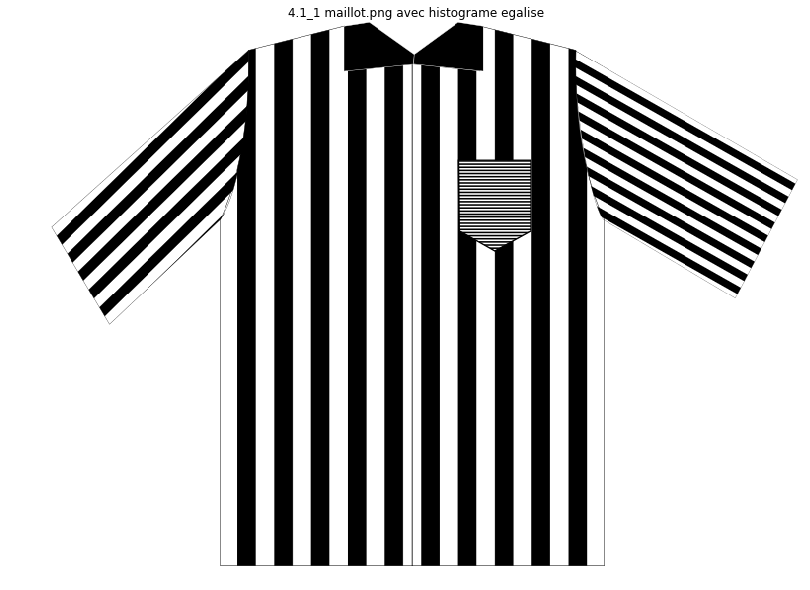

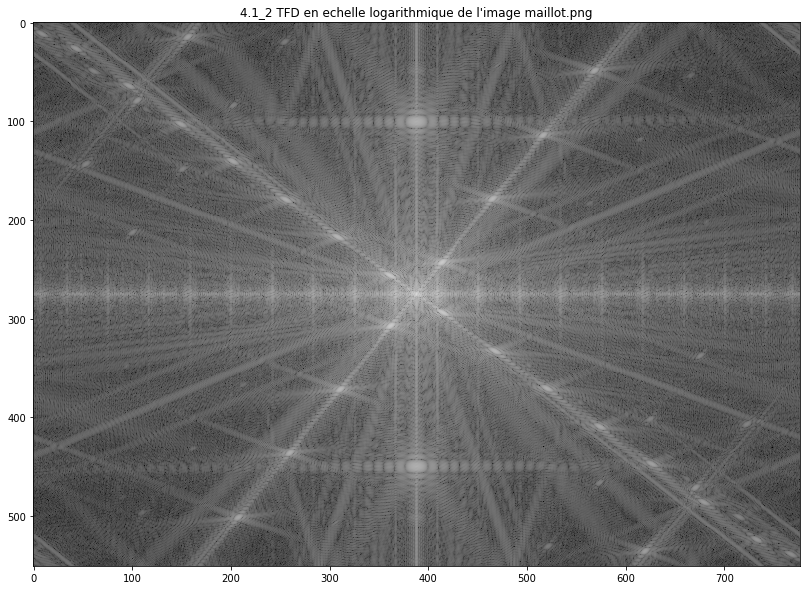

In [14]:
# Exercice IV

img = cv2.imread('maillot.png', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,10))
plt.title('4.1_1 maillot.png avec histograme egalise')
plt.axis('off');
plt.imshow(img, cmap='gray')
plt.show()

# Inspire de https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.figure(figsize=(20,10))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("4.1_2 TFD en echelle logarithmique de l'image maillot.png")
plt.show()


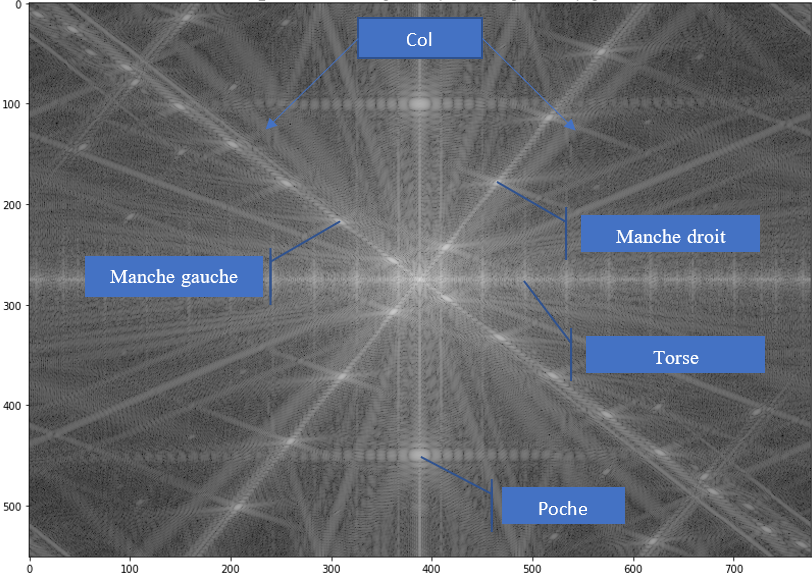

In [15]:
# 4.2
Image("maillot_spectre.png")

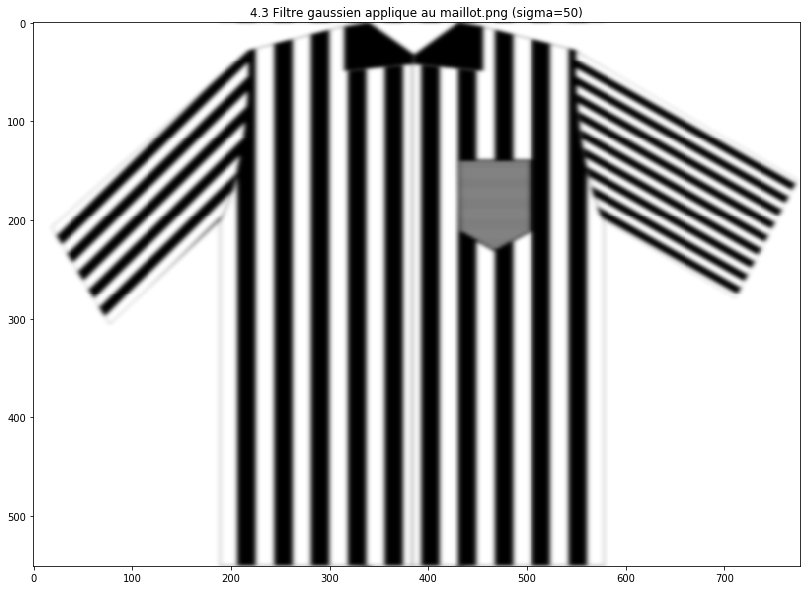

In [16]:
#
# fspecial gausian mask
# obtenu a :
# https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
#
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
mask = matlab_style_gauss2D(shape=(rows,cols), sigma=50)
masks = np.zeros(dft_shift.shape)
for i in range(len(mask)):
    for j in range(len(mask[i])):
        masks[i][j][0] = mask[i][j]
        masks[i][j][1] = mask[i][j]
mask = np.array(mask)

fshift = dft_shift*masks
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(20,10))
plt.imshow(img_back, cmap='gray')
plt.title("4.3 Filtre gaussien applique au maillot.png (sigma=50)")
plt.show()


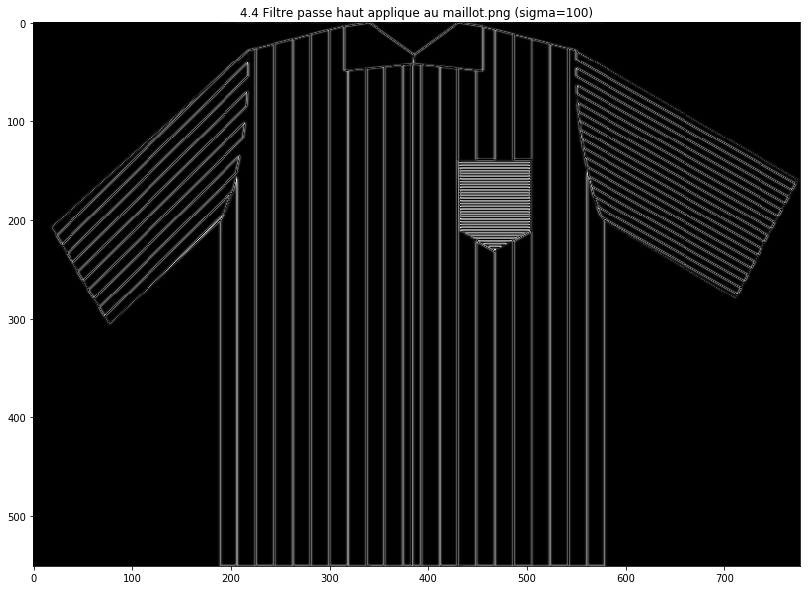

In [17]:
# 4.4

# filtre passe passe-bas gaussien
mask = matlab_style_gauss2D(shape=(rows,cols), sigma=100)
# filtre passe haut gaussien
mask = mask.max() - mask

masks = np.zeros(dft_shift.shape)
for i in range(len(mask)):
    for j in range(len(mask[i])):
        masks[i][j][0] = mask[i][j]
        masks[i][j][1] = mask[i][j]
mask = np.array(mask)

fshift = dft_shift*masks
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(20,10))
plt.imshow(img_back, cmap='gray')
plt.title("4.4 Filtre passe haut applique au maillot.png (sigma=100)")
plt.show()


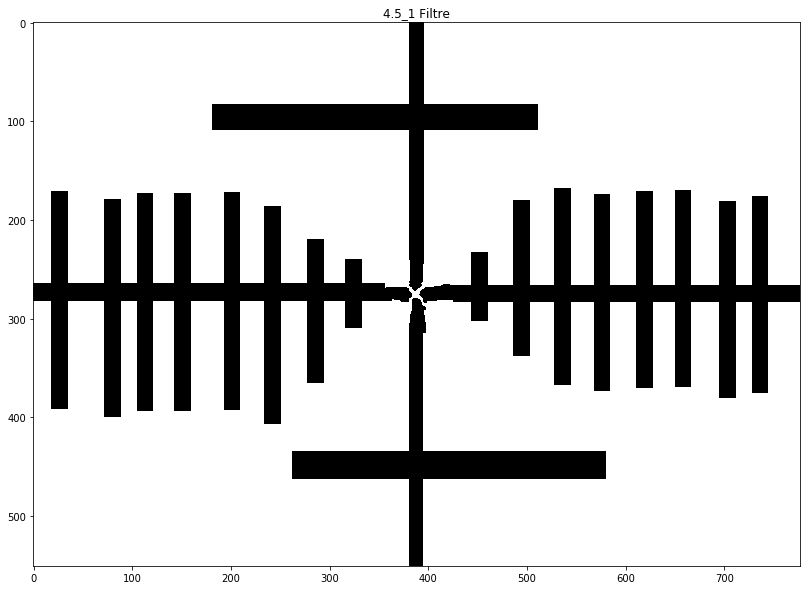

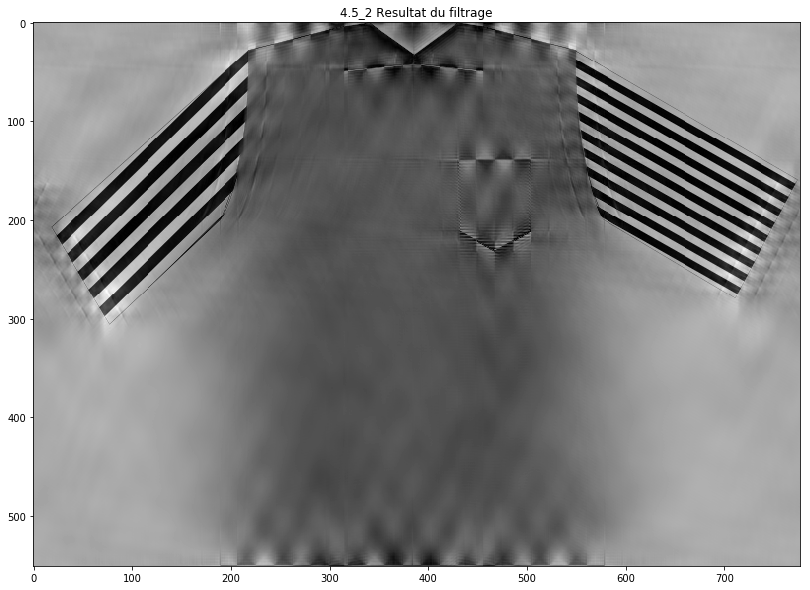

In [18]:
# 4.5

filtre = cv2.imread("filtre4_5.png",  cv2.IMREAD_GRAYSCALE)
filtre = (filtre != 0).astype('uint8')

plt.figure(figsize=(20,10))
plt.imshow(filtre, cmap='gray')
plt.title("4.5_1 Filtre")
plt.show()

filtres = np.zeros(dft_shift.shape)
for i in range(len(filtre)):
    for j in range(len(filtre[i])):
        filtres[i][j][0] = filtre[i][j]
        filtres[i][j][1] = filtre[i][j]

fshift = dft_shift*filtres
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


plt.figure(figsize=(20,10))
plt.imshow(img_back, cmap='gray')
plt.title("4.5_2 Resultat du filtrage")
plt.show()

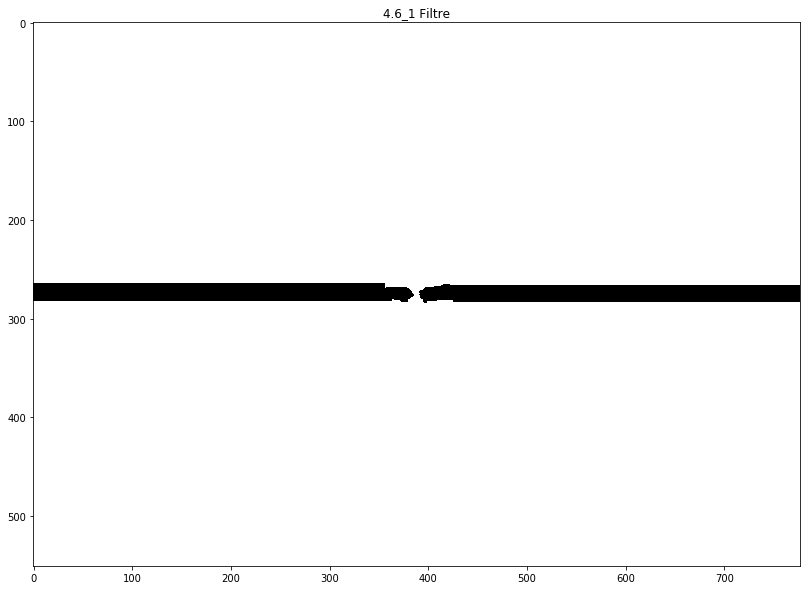

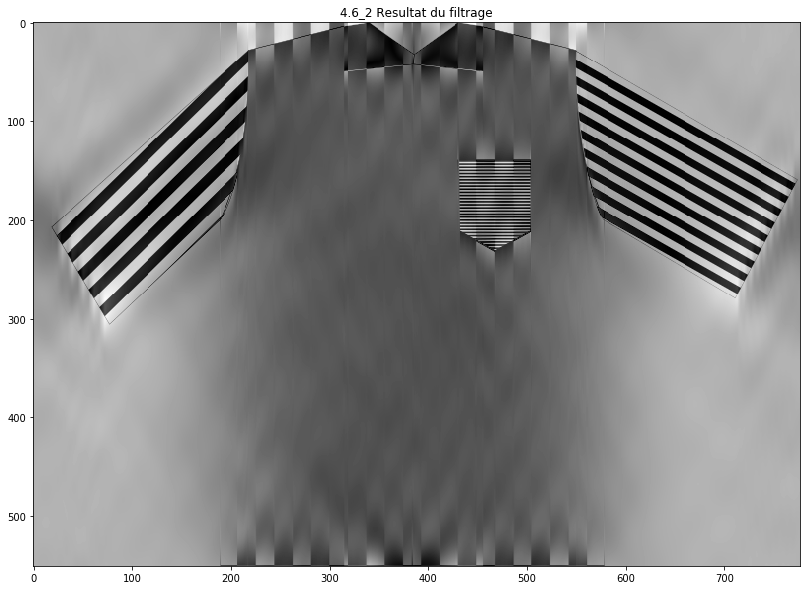

In [19]:
# 4.6

filtre = cv2.imread("filtre4_6.png",  cv2.IMREAD_GRAYSCALE)
filtre = (filtre != 0).astype('uint8')

plt.figure(figsize=(20,10))
plt.imshow(filtre, cmap='gray')
plt.title("4.6_1 Filtre")
plt.show()

filtres = np.zeros(dft_shift.shape)
for i in range(len(filtre)):
    for j in range(len(filtre[i])):
        filtres[i][j][0] = filtre[i][j]
        filtres[i][j][1] = filtre[i][j]

fshift = dft_shift*filtres
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


plt.figure(figsize=(20,10))
plt.imshow(img_back, cmap='gray')
plt.title("4.6_2 Resultat du filtrage")
plt.show()

In [20]:
# 4.7
print("""
4.7 Un filtre idéal est un filtre passe-bas qui filtre en fonction d'une fréquence de coupure. Il est très simple, mais induit une création d'artefacts.
Le filtre butterworth est aussi un filtre passe-bas simple à mettre en place, mais la valeur du filtre n'est pas binaire. Cela réduit beaucoup la création d'artéfacts. Cependant, on peut augmenter l'ordre du filtre Butterworth pour qu'il devienne plus précis et à ce moment il devient très similaire à un filtre idéal.
""")


4.7 Un filtre idéal est un filtre passe-bas qui filtre en fonction d'une fréquence de coupure. Il est très simple, mais induit une création d'artefacts.
Le filtre butterworth est aussi un filtre passe-bas simple à mettre en place, mais la valeur du filtre n'est pas binaire. Cela réduit beaucoup la création d'artéfacts. Cependant, on peut augmenter l'ordre du filtre Butterworth pour qu'il devienne plus précis et à ce moment il devient très similaire à un filtre idéal.



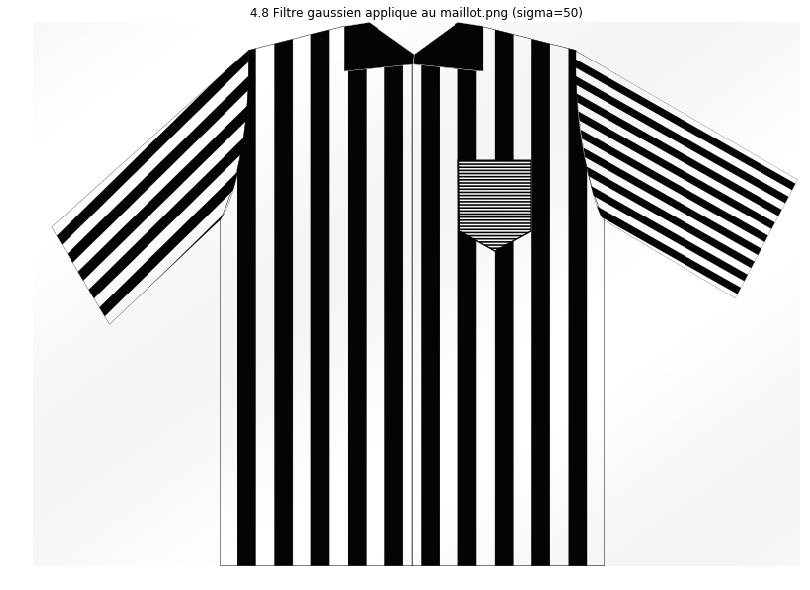


La fréquence au centre du domaine spectral de l'image, aussi appelée valeur DC ou bien le panier 0, représente la moyenne de l'ensemble des couleurs présentes sur l'image.
Dans notre cas, le fait de la mettre à 0 a des effet minimes. Avant tout, on remarque que le blanc de l'image initiallment du #FFFFFF, tend mainteannt légèrement vers le gris. Les lignes noires du maillot, au contraire, sont devenues moins noires. En effet, elles etaient initialment à une couleur #000000, mais après avoir mis la valeur DC à 0, les rayures ont pris une couleur de #040404.
On conclue donc qu'élminer cette frequence a pour but d'attenuer toutes les couleurs sur l'image.



In [21]:
# 4.8

img = cv2.imread('maillot.png', cv2.IMREAD_GRAYSCALE)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

mid_row = int((len(dft_shift) + 1 ) / 2)
mid_col = int((len(dft_shift[0])  + 1) / 2)

dft_shift[mid_row][mid_col][0] = 0
dft_shift[mid_row][mid_col][1] = 0

f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(figsize=(20,10))
plt.imshow(img_back, cmap='gray')
plt.title("4.8 Filtre gaussien applique au maillot.png (sigma=50)")
plt.axis('off');
plt.show()

print("""
La fréquence au centre du domaine spectral de l'image, aussi appelée valeur DC ou bien le panier 0, représente la moyenne de l'ensemble des couleurs présentes sur l'image.
Dans notre cas, le fait de la mettre à 0 a des effet minimes. Avant tout, on remarque que le blanc de l'image initiallment du #FFFFFF, tend mainteannt légèrement vers le gris. Les lignes noires du maillot, au contraire, sont devenues moins noires. En effet, elles etaient initialment à une couleur #000000, mais après avoir mis la valeur DC à 0, les rayures ont pris une couleur de #040404.
On conclue donc qu'élminer cette frequence a pour but d'attenuer toutes les couleurs sur l'image.
""")

In [22]:
# 4.9

print("""
4.9 Un filtre passe haut
Car cela fera en sorte d'afficher les fréquences en ordre décroissant: la poche en premier, suivi des manches, du torse, du col et enfin, quand le filtre va laisser passer l'ensemble des fréquences, on aura la couleur moyenne.
Les fréquences que nous regardons sont bien sur celles des rayures.
""")


4.9 Un filtre passe haut
Car cela fera en sorte d'afficher les fréquences en ordre décroissant: la poche en premier, suivi des manches, du torse, du col et enfin, quand le filtre va laisser passer l'ensemble des fréquences, on aura la couleur moyenne.
Les fréquences que nous regardons sont bien sur celles des rayures.

